In [33]:
import pandas as pd  # For data manipulation and loading CSV files
import matplotlib.pyplot as plt  # For data visualization
import seaborn as sns  # For advanced visualizations
from sklearn.model_selection import train_test_split  # To split dataset into training and testing sets
from sklearn.preprocessing import LabelEncoder  # To convert categorical variables into numerical values
from sklearn.naive_bayes import GaussianNB  # Importing Naive Bayes classifier
from sklearn.metrics import accuracy_score, confusion_matrix  # For model evaluation

In [35]:
data=pd.read_csv("weather.csv")

In [37]:
data.head()

,outlook,temperature,humidity,windy,play
0,overcast,hot,high,False,yes
1,overcast,cool,normal,True,yes
2,overcast,mild,high,True,yes
3,overcast,hot,normal,False,yes
4,rainy,mild,high,False,yes


In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   outlook      14 non-null     object
 1   temperature  14 non-null     object
 2   humidity     14 non-null     object
 3   windy        14 non-null     bool  
 4   play         14 non-null     object
dtypes: bool(1), object(4)
memory usage: 594.0+ bytes


In [41]:
data.describe()

,outlook,temperature,humidity,windy,play
count,14,14,14,14,14
unique,3,3,2,2,2
top,rainy,mild,high,False,yes
freq,5,6,7,8,9


In [43]:
# Encode categorical variables
label_encoders = {}
for column in ['outlook', 'temperature', 'humidity', 'windy', 'play']:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

In [45]:
# Split data into features (X) and target (y)
X = data[['outlook', 'temperature', 'humidity', 'windy']]
y = data['play']
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Train model using Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [49]:
# Make predictions on the test set
y_pred = model.predict(X_test)
# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 33.33%


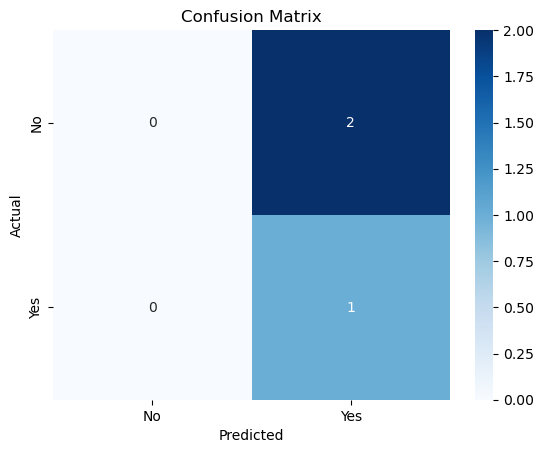

In [51]:
# Generate confusion matrix and visualize it
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# Function to predict play decision based on input weather conditions
def predict_play(outlook, temperature, humidity, windy):
    input_data = [[
        label_encoders['outlook'].transform([outlook])[0],
        label_encoders['temperature'].transform([temperature])[0],
        label_encoders['humidity'].transform([humidity])[0],
        label_encoders['windy'].transform([windy])[0]
    ]]
    prediction = model.predict(input_data)
    return label_encoders['play'].inverse_transform(prediction)[0]

In [55]:
# Example 
print(predict_play('sunny', 'cool', 'normal', 'FALSE'))

no


C:\Users\Everlyn\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


C:\Users\Everlyn\AppData\Local\Temp\ipykernel_15832\2369552780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='play', data=data, palette='viridis')


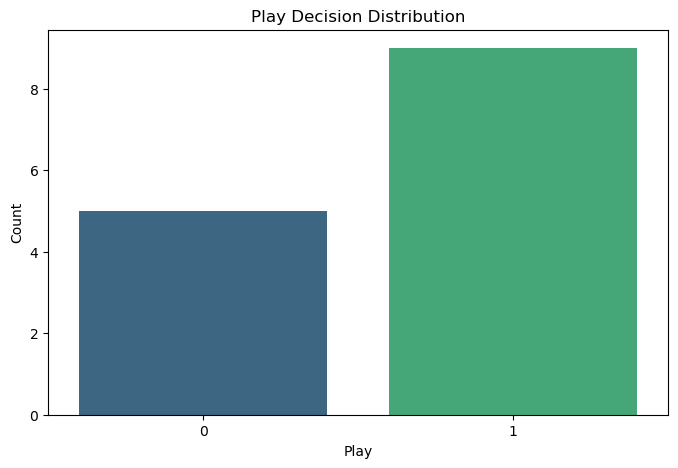

In [59]:
# Visualize play decision distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='play', data=data, palette='viridis')
plt.title('Play Decision Distribution')
plt.xlabel('Play')
plt.ylabel('Count')
plt.show()

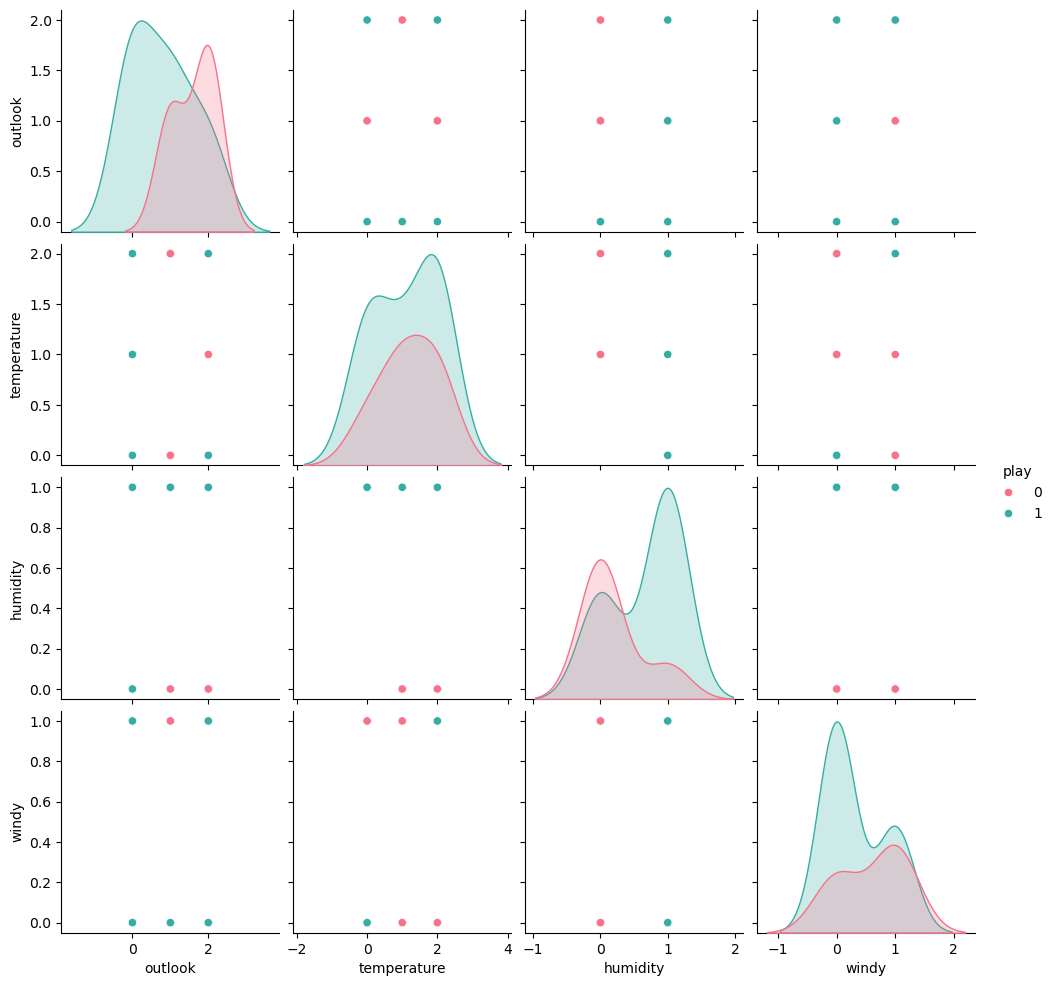

In [63]:
# Pairplot visualization of dataset
sns.pairplot(data, hue='play', palette='husl')
plt.show()